In [65]:
 pip install -U libsvm-official

In [66]:
from libsvm.svmutil import *

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [68]:
# Load the training and test data
train_file = 'ncRNA_s.train.txt'
test_file = 'ncRNA_s.test.txt'

# Read the training and test data
y_train, x_train = svm_read_problem(train_file)
y_test, x_test = svm_read_problem(test_file)



Accuracy = 66.4336% (665/1001) (classification)
Accuracy = 66.4336% (665/1001) (classification)
Accuracy = 66.4336% (665/1001) (classification)
Accuracy = 77.8222% (779/1001) (classification)
Accuracy = 92.5075% (926/1001) (classification)
Accuracy = 94.006% (941/1001) (classification)
Accuracy = 93.7063% (938/1001) (classification)
Accuracy = 93.8062% (939/1001) (classification)
Accuracy = 93.8062% (939/1001) (classification)
Accuracy = 93.8062% (939/1001) (classification)
Accuracy = 93.8062% (939/1001) (classification)
Accuracy = 93.8062% (939/1001) (classification)
Accuracy = 93.8062% (939/1001) (classification)


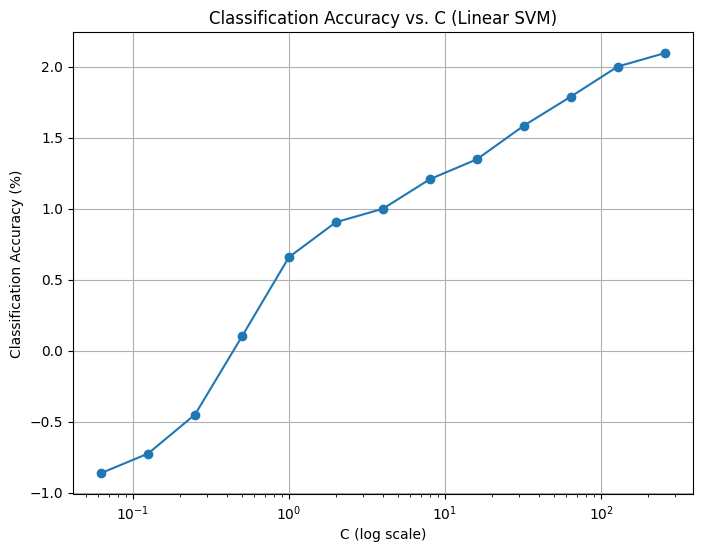

In [69]:

# Values of C to test (from 2^-4 to 2^8)
C_values = [2**i for i in range(-4, 9)]
accuracies = []

for C in C_values:
    param = f'-t 0 -c {C}'  # linear kernel
    model = svm_train(y_train, x_train, param)

    _, _, accuracy = svm_predict(y_test, x_test, model)
    accuracies.append(accuracy[0])


# Plot the results
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, accuracies, marker='o')  # Log scale for C values
plt.xlabel('C (log scale)')
plt.ylabel('Classification Accuracy (%)')
plt.title('Classification Accuracy vs. C (Linear SVM)')
plt.grid(True)
plt.show()


Accuracy = 66% (132/200) (classification)
Accuracy = 67% (134/200) (classification)
Accuracy = 66.5% (133/200) (classification)
Accuracy = 68% (136/200) (classification)
Accuracy = 66.5% (133/200) (classification)
C=0.0625, alpha=0.0625, Accuracy=66.80%
Accuracy = 66% (132/200) (classification)
Accuracy = 67% (134/200) (classification)
Accuracy = 66.5% (133/200) (classification)
Accuracy = 68% (136/200) (classification)
Accuracy = 66.5% (133/200) (classification)
C=0.0625, alpha=0.125, Accuracy=66.80%
Accuracy = 66% (132/200) (classification)
Accuracy = 67% (134/200) (classification)
Accuracy = 66.5% (133/200) (classification)
Accuracy = 68% (136/200) (classification)
Accuracy = 66.5% (133/200) (classification)
C=0.0625, alpha=0.25, Accuracy=66.80%
Accuracy = 66% (132/200) (classification)
Accuracy = 67% (134/200) (classification)
Accuracy = 66.5% (133/200) (classification)
Accuracy = 68% (136/200) (classification)
Accuracy = 66.5% (133/200) (classification)
C=0.0625, alpha=0.5, Accura

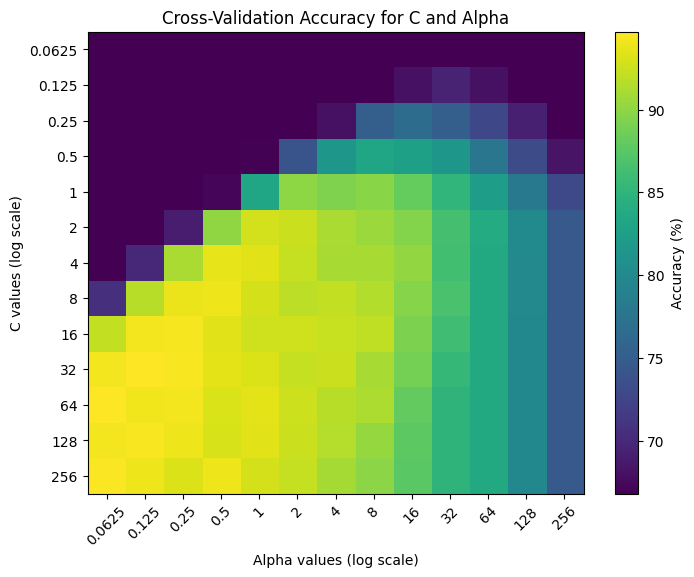


Best C: 64, Best Alpha: 0.0625, Best Accuracy: 94.70%


In [70]:

# Defining the values of C and alpha
C_values = [2**i for i in range(-4, 9)]
alpha_values = [2**i for i in range(-4, 9)]

# Randomly selecting 50% of the training set
train_size = len(y_train)
cv_indices = random.sample(range(train_size), train_size // 2)  # 50% random selection
cv_y = [y_train[i] for i in cv_indices]
cv_x = [x_train[i] for i in cv_indices]

# to perform 5-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = np.zeros((len(C_values), len(alpha_values)))

best_accuracy = 0
best_C = None
best_alpha = None

for i, C in enumerate(C_values):
    for j, alpha in enumerate(alpha_values):
        accuracies = []

        for train_idx, val_idx in kf.split(cv_x):
            train_fold = [cv_x[k] for k in train_idx]
            val_fold = [cv_x[k] for k in val_idx]
            train_labels = [cv_y[k] for k in train_idx]
            val_labels = [cv_y[k] for k in val_idx]

            param = f'-t 2 -c {C} -g {alpha}'  #  RBF kernel
            model = svm_train(train_labels, train_fold, param)

            # Validate the model on the fold
            _, accuracy, _ = svm_predict(val_labels, val_fold, model)
            accuracies.append(accuracy[0])  # Correctly access the accuracy value

        # Compute the average accuracy for this combination of C and alpha
        avg_accuracy = np.mean(accuracies)
        cv_results[i, j] = avg_accuracy

        # Print the accuracy for this combination
        print(f'C={C}, alpha={alpha}, Accuracy={avg_accuracy:.2f}%')

        # Update best accuracy and parameters
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_C = C
            best_alpha = alpha

# Plot the results
plt.figure(figsize=(8, 6))
plt.imshow(cv_results, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(label='Accuracy (%)')
plt.xticks(np.arange(len(alpha_values)), alpha_values, rotation=45)
plt.yticks(np.arange(len(C_values)), C_values)
plt.xlabel('Alpha values (log scale)')
plt.ylabel('C values (log scale)')
plt.title('Cross-Validation Accuracy for C and Alpha')
plt.show()

# Print the best C and alpha with the highest accuracy
print(f'\nBest C: {best_C}, Best Alpha: {best_alpha}, Best Accuracy: {best_accuracy:.2f}%')


In [72]:

print("Cross-validation accuracy matrix (C vs Alpha):")
print(cv_results)

Cross-validation accuracy matrix (C vs Alpha):
[[66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8]
 [66.8 66.8 66.8 66.8 66.8 66.8 66.8 66.8 68.1 69.5 68.1 66.8 66.8]
 [66.8 66.8 66.8 66.8 66.8 66.8 68.1 75.3 76.7 75.3 72.9 69.2 66.8]
 [66.8 66.8 66.8 66.8 67.  74.  81.6 83.3 82.7 81.6 77.7 73.3 68.3]
 [66.8 66.8 66.8 67.3 83.2 90.  89.3 89.7 88.1 85.2 82.4 78.1 73. ]
 [66.8 66.8 69.  90.1 92.8 92.5 91.2 90.5 89.5 86.5 84.  80.2 74.6]
 [66.8 69.9 91.2 93.7 93.4 92.2 91.1 91.  90.2 86.3 83.8 79.9 74.6]
 [70.6 91.7 93.9 94.  92.9 91.9 92.1 91.5 89.6 86.7 83.7 79.9 74.6]
 [92.1 94.2 94.3 93.5 92.7 92.7 92.4 92.  89.2 86.1 83.8 79.8 74.6]
 [94.2 94.6 94.4 93.6 93.2 92.3 92.5 91.1 88.9 85.4 83.8 79.8 74.6]
 [94.7 94.1 94.2 93.1 93.6 92.6 91.7 91.3 88.  85.  83.8 79.8 74.6]
 [94.2 94.4 94.  93.  93.5 92.5 91.6 90.3 87.7 85.  83.8 79.8 74.6]
 [94.5 94.  93.2 94.  92.9 92.2 90.9 89.8 87.6 85.  83.8 79.8 74.6]]


In [73]:
# Training the SVM on the full training set using the best C and alpha
best_param = f'-t 2 -c {best_C} -g {best_alpha}'
model = svm_train(y_train, x_train, best_param)

# Predict on the test set
predictions, _, test_accuracy = svm_predict(y_test, x_test, model)


Accuracy = 94.006% (941/1001) (classification)
